In [5]:
Pr_Positive_Vampire <- 0.95 
Pr_Positive_Moral <- 0.01
Pr_Vampire <- 0.001
Pr_Positive <- Pr_Positive_Vampire * Pr_Vampire + Pr_Positive_Moral * (1 - Pr_Vampire)
(Pr_Vampire_Positive <- Pr_Positive_Vampire * Pr_Vampire / Pr_Positive)

[1] 0.08683729

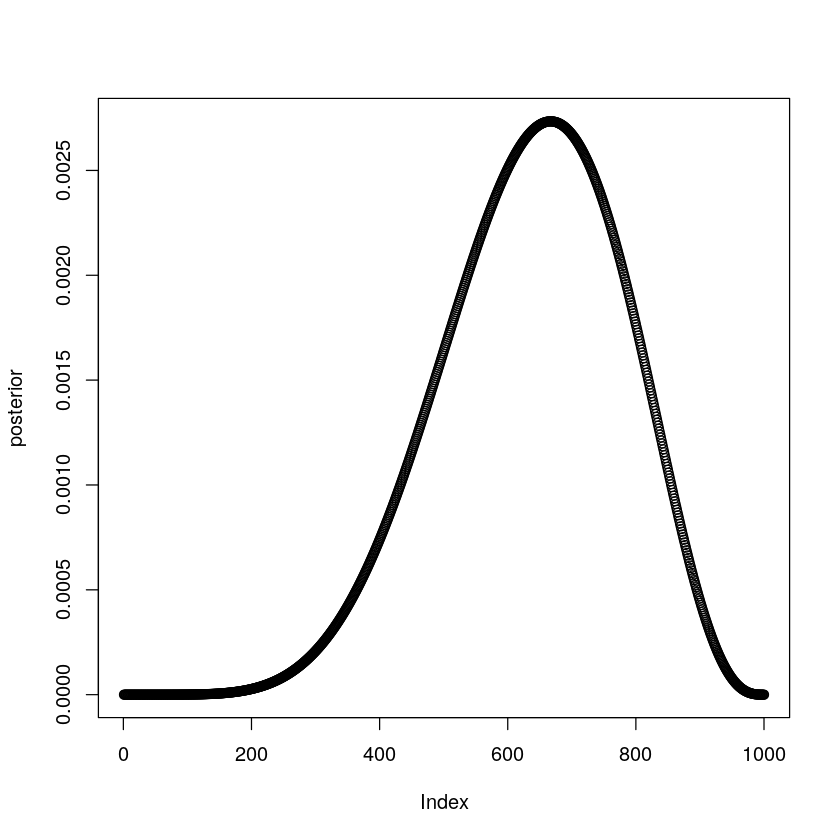

In [15]:
p_grid <- seq(from=0, to=1, length.out=1000)
prob_p <- rep(1, 1000)
prob_data <- dbinom(6, size=9, prob=p_grid)
posterior <- prob_data * prob_p
posterior <- posterior / sum(posterior)
plot(posterior)

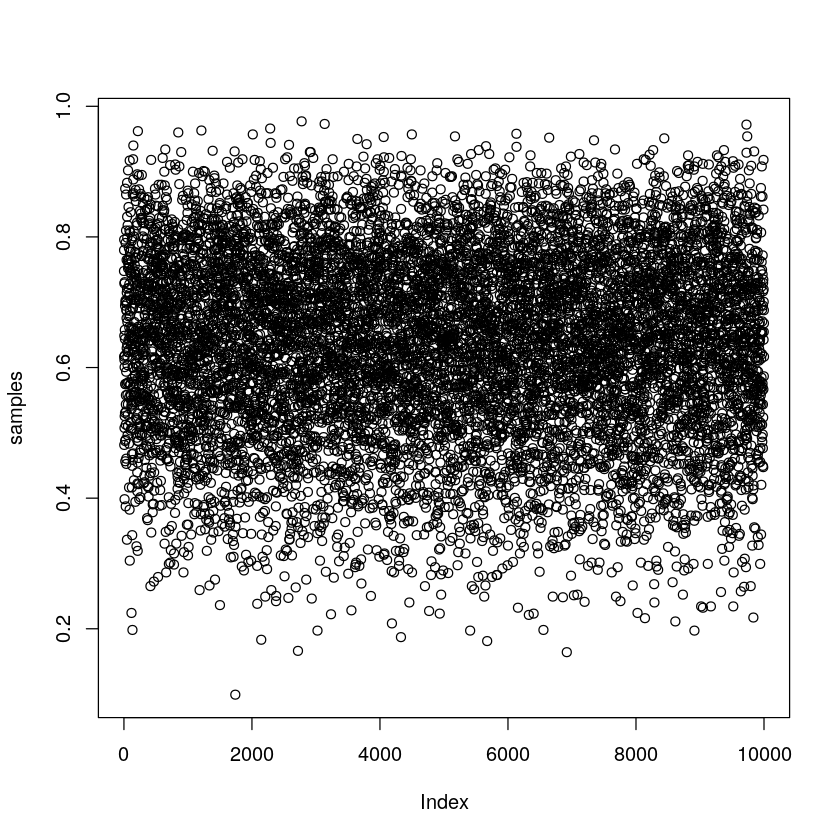

In [12]:
samples = sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
plot(samples)

In [13]:
library("rethinking")

Loading required package: rstan
Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 2.13)

Attaching package: ‘rethinking’

The following object is masked from ‘package:stats’:

    rstudent



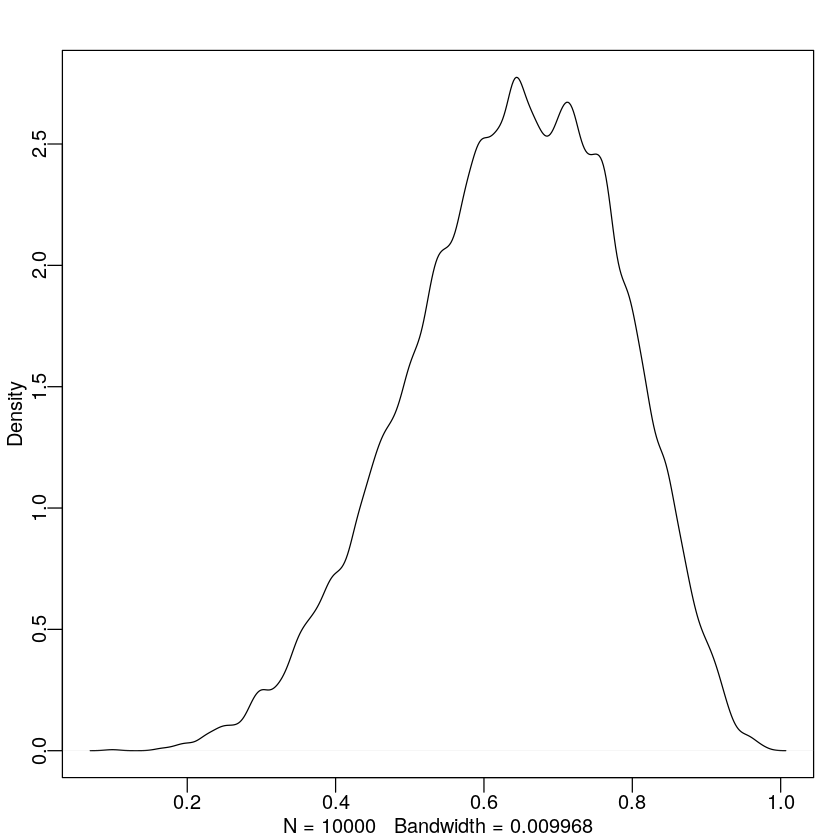

In [14]:
dens(samples)

In [16]:
sum(posterior[p_grid < 0.5])

[1] 0.1718746

In [21]:
sum(samples < 0.5) / 1e4

[1] 0.1721

In [30]:
quantile(samples, 0.8)

80% 
0.7617618

In [27]:
quantile(samples, c(0.1, 0.9))

10%       90% 
0.4473473 0.8118118

In [40]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(3, size=3, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples <- sample(p_grid, size=1e4, replace=TRUE, prob=posterior)


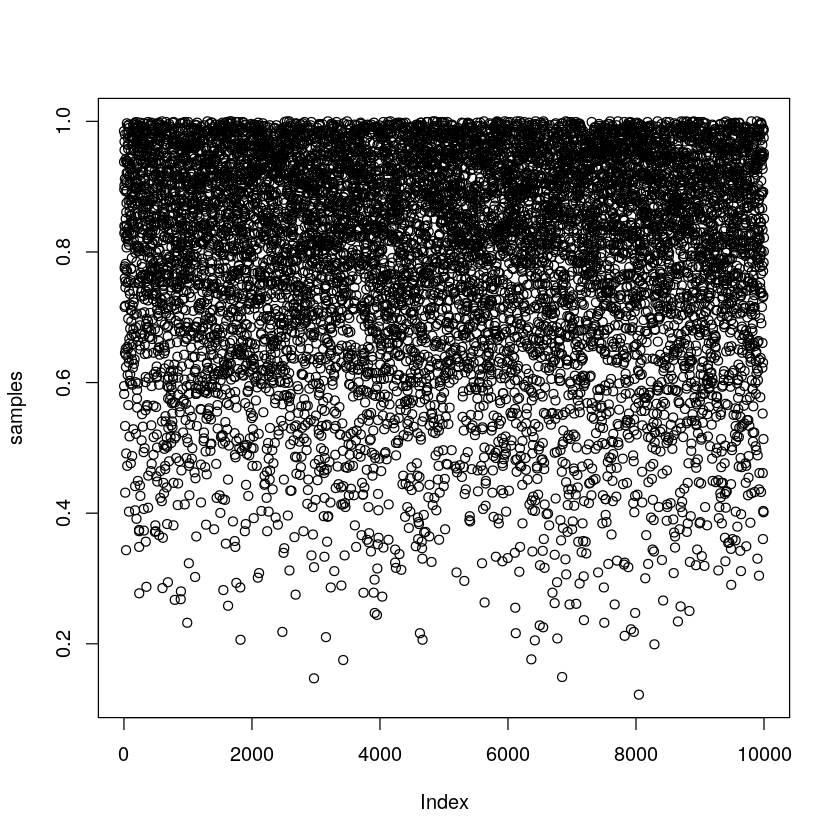

In [41]:
plot(samples) 

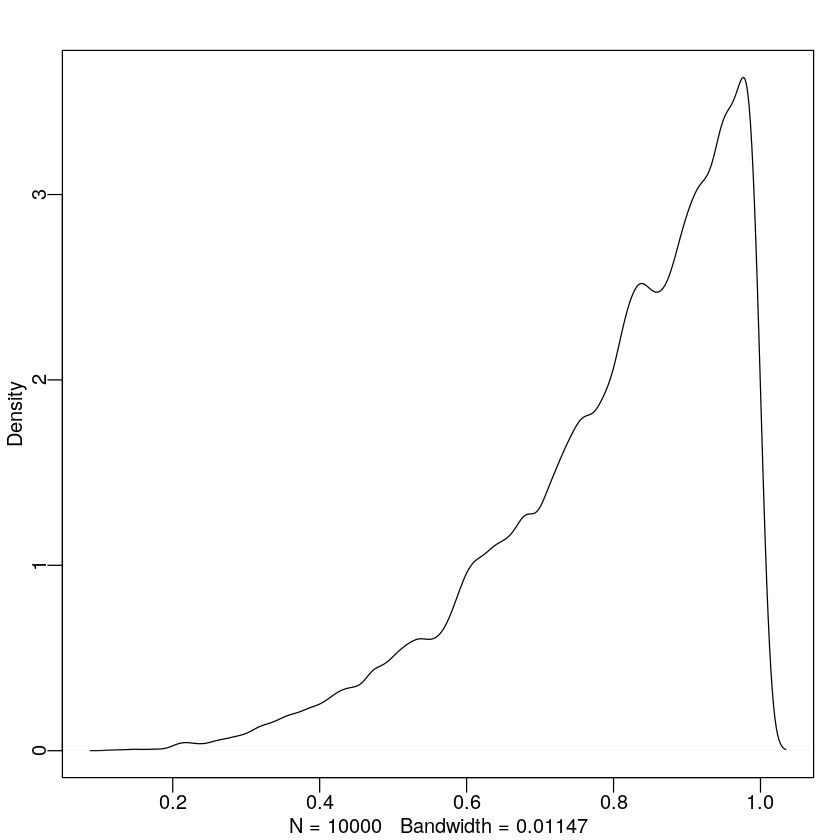

In [42]:
dens(samples)

In [43]:
PI(samples, prob=0.5)

25%       75% 
0.7077077 0.9299299

In [44]:
HPDI(samples, prob=0.5)

|0.5      0.5| 
0.8368368 0.9989990

# 3.2.3 Point Estimates

In [50]:
p_grid[which.max(posterior)] # MAP

[1] 1

In [52]:
estimate = 0.5
sum(posterior * abs(estimate - p_grid))

[1] 0.3128752

In [54]:
loss <- sapply(p_grid, function(d) sum(posterior * abs(d - p_grid)))
p_grid[which.min(loss)]

[1] 0.8408408

In [55]:
median(samples)

[1] 0.8378378

# 3.3: Sampling to Simulate Prediction

In [57]:
dbinom(0:2, size=2, prob=0.7)

[1] 0.09 0.42 0.49

In [62]:
rbinom(10, size=2, prob=0.7)

[1] 2 0 2 1 2 2 0 2 1 2

In [63]:
dummy_w <- rbinom(1e5, size=2, prob=0.7)
table(dummy_w) / 1e5

dummy_w
      0       1       2 
0.09114 0.41879 0.49007 

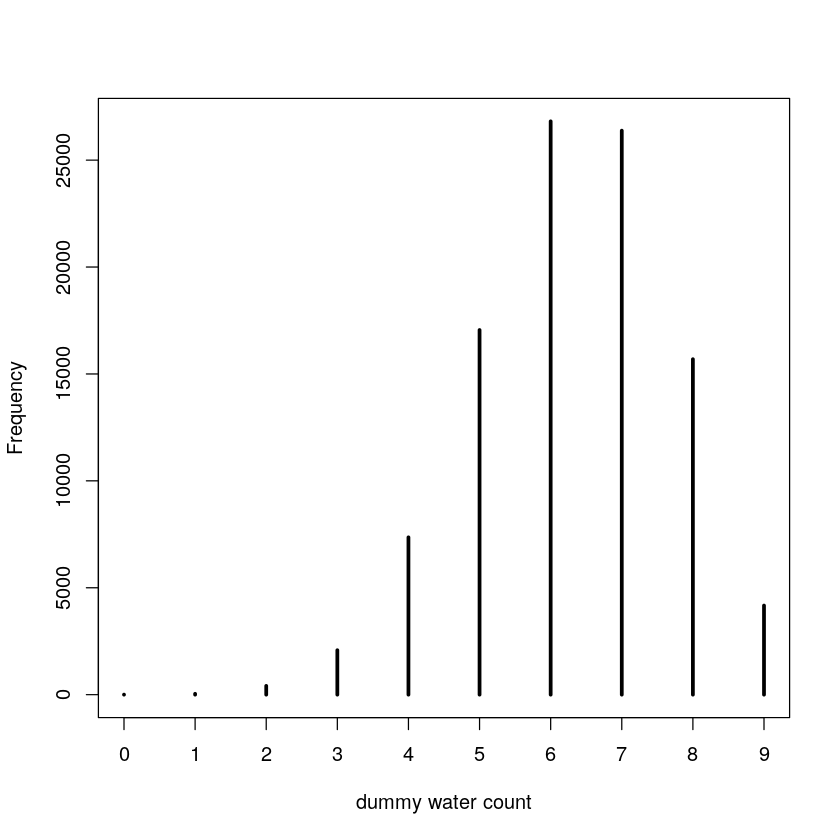

In [64]:
dummy_w <- rbinom(1e5, size=9, prob=0.7)
simplehist(dummy_w, xlab="dummy water count")

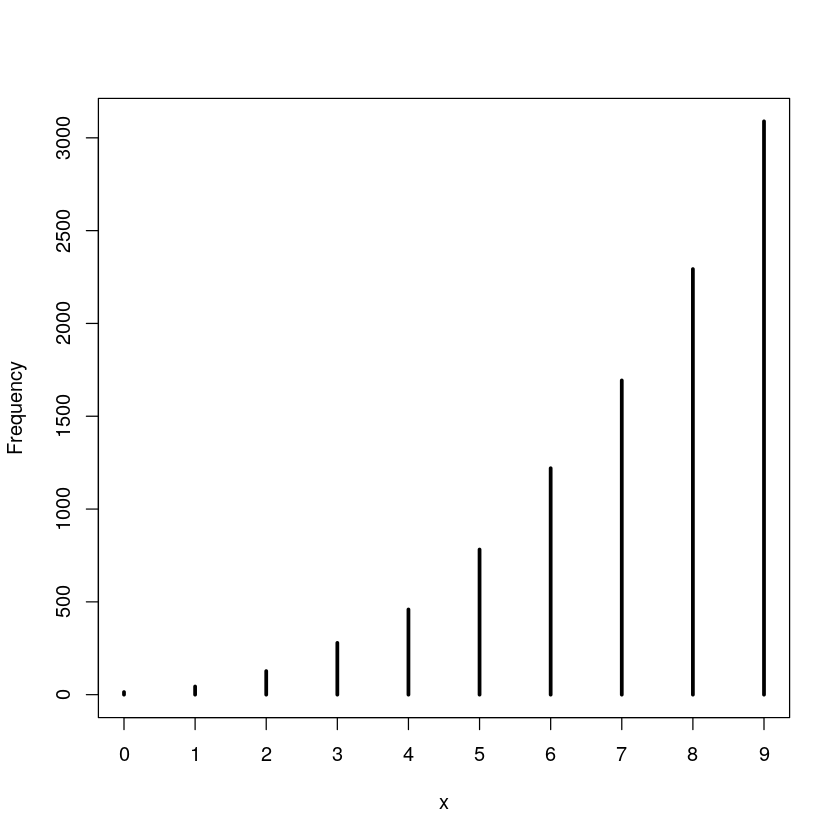

In [69]:
w <- rbinom(1e4, size=9, prob=samples)
simplehist(w)

# exercises

In [72]:
# dummy data
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

In [81]:
quantile(samples, 0.2)

20% 
0.5185185

In [128]:
# 3E1
sum(samples < 0.2) / 1e4

[1] 4e-04

In [88]:
# 3E2
sum(samples < 0.8) / 1e4

[1] 0.8884

In [96]:
# 3E3
sum(samples < 0.8 & samples > 0.2) / 1e4

[1] 0.888

In [126]:
# 3E4 - 20% of the posterior probability lies below what value of p?
